# Challenge regression - Microsoft

In [25]:
 # Importamos los datos
  
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head() 

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
house_age - the house age (in years)
transit_distance - the distance to the nearest light rail station (in meters)
local_convenience_stores - the number of convenience stores within walking distance
latitude - the geographic coordinate, latitude
longitude - the geographic coordinate, longitude
price_per_unit house price of unit area (3.3 square meters)

# Eliminar filas con valores faltantes (NaN)

In [26]:
data = data.dropna()

# Eliminar duplicados basados en todas las columnas

In [27]:
data = data.drop_duplicates()

# Elimina columnas innecesarias o con muchos valores faltantes

In [28]:
umbral_valores_faltantes = 0.4

columnas_con_valores_faltantes = data.columns[data.isnull().mean() > umbral_valores_faltantes]
data = data.drop(columnas_con_valores_faltantes, axis=1)

print("Columnas con muchos valores faltantes:", columnas_con_valores_faltantes)


Columnas con muchos valores faltantes: Index([], dtype='object')


# Análisis Exploratorio de Datos (EDA)

# Resumen estadístico de las variables numéricas

In [29]:
numeric_vars = ['house_age', 'transit_distance', 'latitude', 'longitude', 'price_per_unit']
print(data[numeric_vars].describe())

        house_age  transit_distance    latitude   longitude  price_per_unit
count  414.000000        414.000000  414.000000  414.000000      414.000000
mean    17.712560       1083.885689   24.969030  121.533361       37.980193
std     11.392485       1262.109595    0.012410    0.015347       13.606488
min      0.000000         23.382840   24.932070  121.473530        7.600000
25%      9.025000        289.324800   24.963000  121.528085       27.700000
50%     16.100000        492.231300   24.971100  121.538630       38.450000
75%     28.150000       1454.279000   24.977455  121.543305       46.600000
max     43.800000       6488.021000   25.014590  121.566270      117.500000


# Gráficos de distribución para variables numéricas

c:\Users\israe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


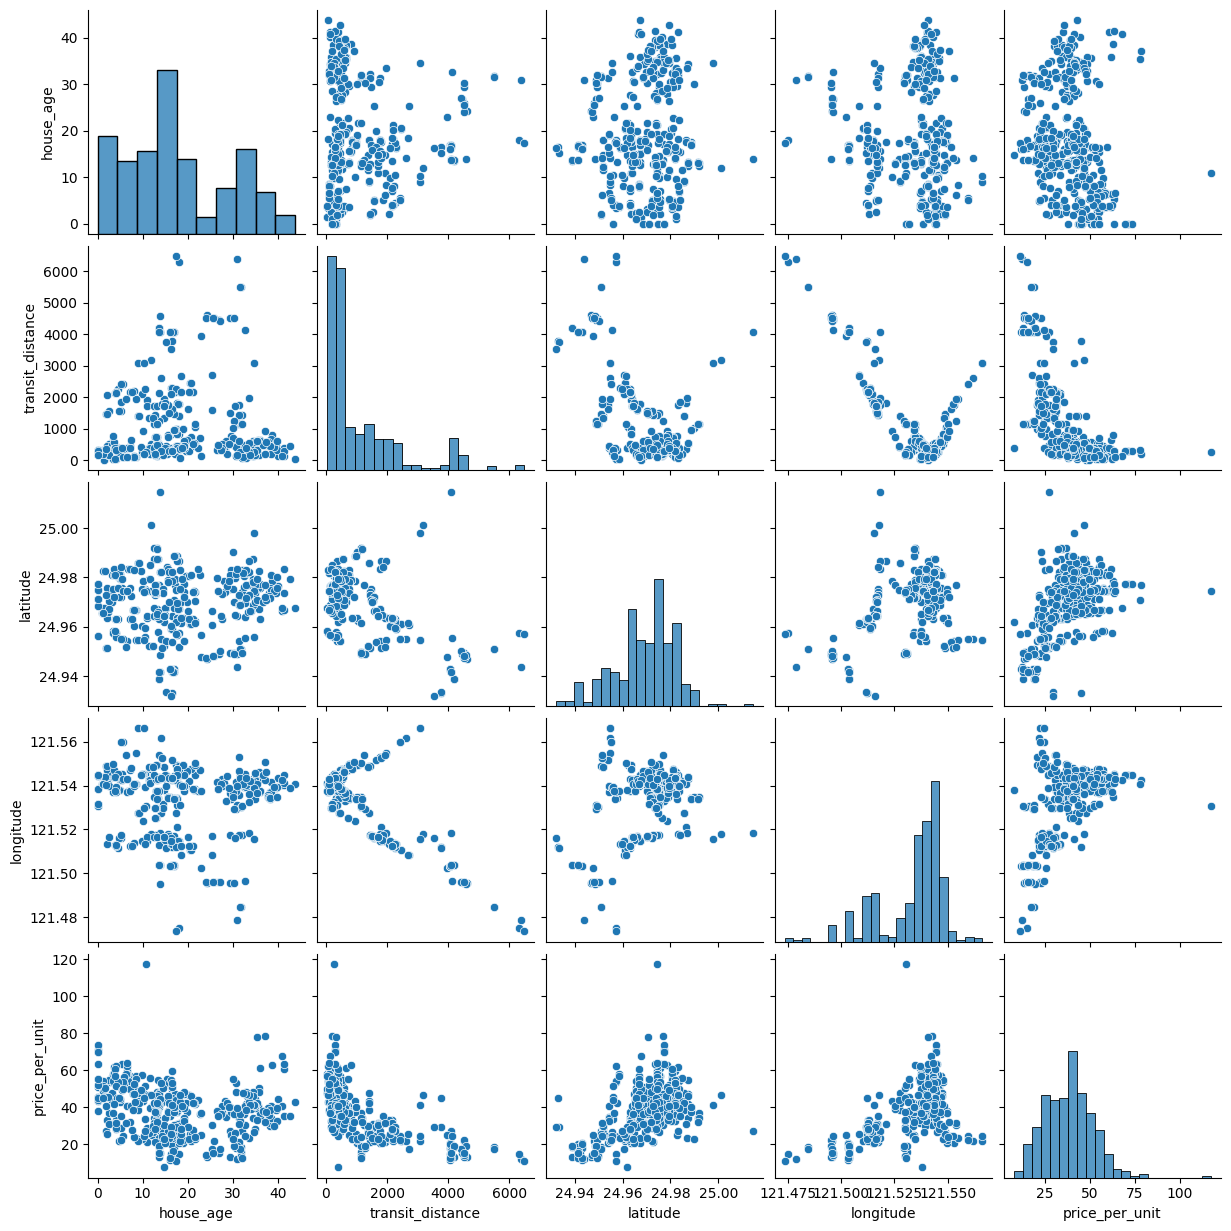

In [30]:
sns.pairplot(data[numeric_vars])
plt.show()

# Preprocesamiento de Datos

# Estandarización de variables numéricas

In [31]:
scaler = StandardScaler()
data[numeric_vars] = scaler.fit_transform(data[numeric_vars])

# Codificación de variable local_convenience_stores como variable dummy

In [32]:
data = pd.get_dummies(data, columns=['local_convenience_stores'], drop_first=True)

# División en conjuntos de entrenamiento y prueba

In [33]:
X = data.drop('price_per_unit', axis=1)
y = data['price_per_unit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Selección de Modelo

In [34]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Random Forest Regression': RandomForestRegressor()
}

best_model = None
best_score = -float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: R2 = {r2:.4f}')

    if r2 > best_score:
        best_model = model
        best_score = r2

print("Mejor modelo:", best_model)

Linear Regression: R2 = 0.6722
Lasso: R2 = -0.0251
Ridge: R2 = 0.6730
ElasticNet: R2 = 0.1360
Random Forest Regression: R2 = 0.7999
Mejor modelo: RandomForestRegressor()


In [35]:
# Mejora del Modelo

# Puedes realizar mejoras adicionales aquí, como eliminación de valores atípicos,
# selección de características, ingeniería de características, etc.

# Evaluación del Modelo Final

In [36]:
y_pred = best_model.predict(X_test)
r2_final = r2_score(y_test, y_pred)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 en conjunto de prueba: {r2_final:.4f}')
print(f'RMSE en conjunto de prueba: {rmse_final:.4f}')

R2 en conjunto de prueba: 0.7999
RMSE en conjunto de prueba: 0.4263


# Interpretación de Resultados

# Coeficientes del modelo (para modelos lineales)

In [37]:
if isinstance(best_model, LinearRegression):
    coeficients = best_model.coef_
    coef_df = pd.DataFrame({'feature': X.columns, 'coeficient': coeficients})
    print(coef_df)

# Gráfico de residuales

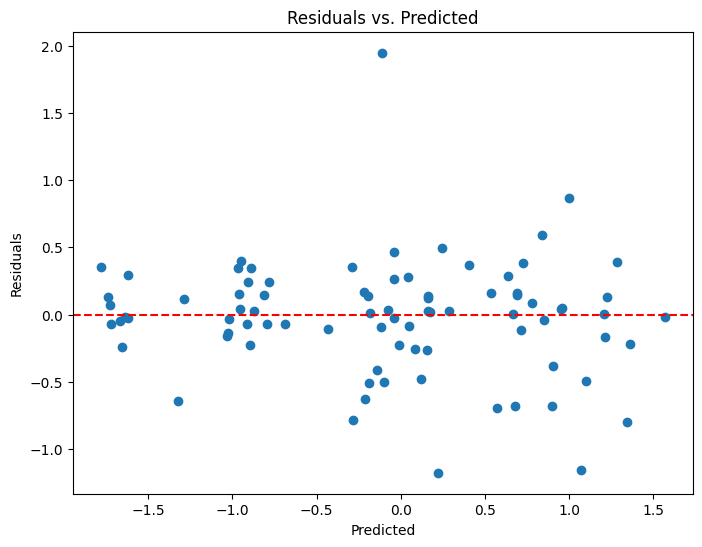

In [38]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

# ... (Preprocesamiento de datos y creación de conjuntos de entrenamiento/prueba)

# Entrena un modelo de Regresión con Random Forest

In [39]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Realiza predicciones en el conjunto de prueba

In [40]:
y_pred = model.predict(X_test)

# Calcula el RMSE en el conjunto de prueba

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE en conjunto de prueba: {rmse:.4f}')

RMSE en conjunto de prueba: 0.4207


# Visualiza las predicciones vs. valores reales

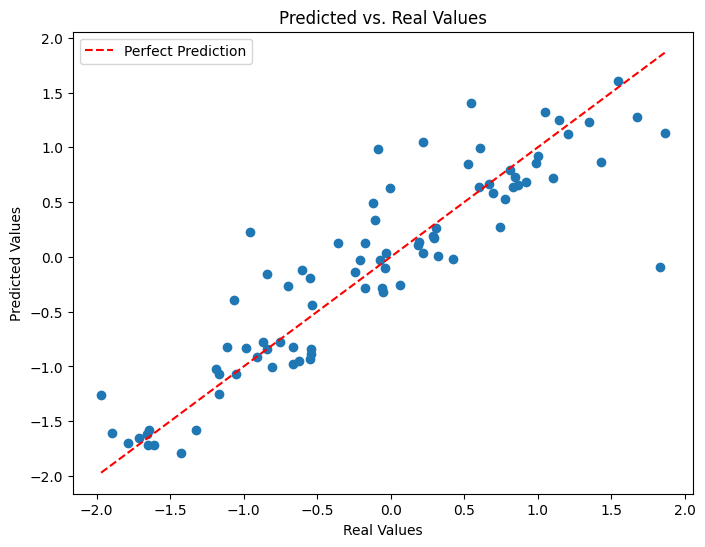

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Real Values')
plt.legend()
plt.show()